## Gaussian Processes

### Neil D. Lawrence

### 12th May 2016

In [22]:
import numpy as np
import pandas as pd
import pods
import matplotlib.pyplot as plt
import mlai
%matplotlib inline

<img src="./diagrams/9780262182539-f30.jpg">
@Rasmussen:book06

### What is Machine Learning?

$$ \text{data} + \text{model} = \text{prediction}$$

-   $\text{data}$ : observations, could be actively or passively
    acquired (meta-data).

-   $\text{model}$ : assumptions, based on previous experience (other data!
    transfer learning etc), or beliefs about the regularities of
    the universe. Inductive bias.

-   $\text{prediction}$ : an action to be taken or a categorization or a
    quality score.

### Olympic Marathon Data

-   Gold medal times for Olympic Marathon since 1896.

-   Marathons before 1924 didn’t have a standardised distance.

-   Present results using pace per km.

-   In 1904 Marathon was badly organised leading to very slow times.

![image](./diagrams/Stephen_Kiprotich.jpg)
Image from Wikimedia Commons <http://bit.ly/16kMKHQ>

### Olympic Marathon Data

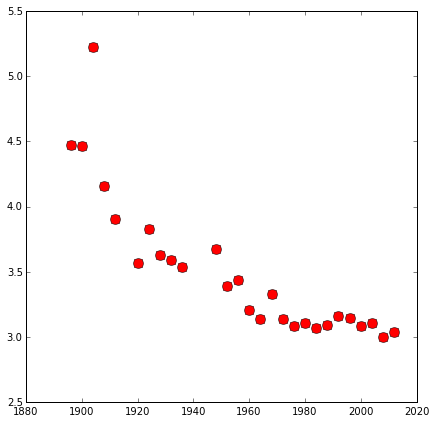

In [23]:
data = pods.datasets.olympic_marathon_men()
f, ax = plt.subplots(figsize=(7,7))
ax.plot(data['X'], data['Y'], 'ro',markersize=10)

# Overdetermined System

![](diagrams/straight_line7.svg)

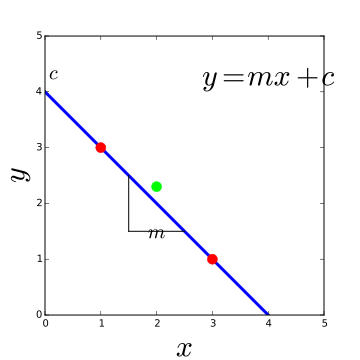

In [24]:
pods.notebook.display_plots('straight_line{samp}.svg', directory='./diagrams', samp=(1, 7))

# $y = mx + c$

point 1: $x = 1$, $y=3$ $$3 = m + c$$ 
point 2: $x = 3$, $y=1$ $$1 = 3m + c$$ 
point 3: $x = 2$, $y=2.5$ $$2.5 = 2m + c$$

<img src="diagrams/Pierre-Simon_Laplace.png" align=center width=50%>

<img src="diagrams/LaplacesDeterminismFrench.png" align=center width=50%>

<img src="diagrams/LaplacesDeterminismEnglish.png" align=center width=50%>

<img src="diagrams/philosophicaless00lapliala.png" align=center width=50%>

# $y = mx + c + \epsilon$

point 1: $x = 1$, $y=3$ 
$$3 = m + c + \epsilon_1$$ 

point 2: $x = 3$, $y=1$ 
$$1 = 3m + c + \epsilon_2$$ 

point 3: $x = 2$, $y=2.5$ 
$$2.5 = 2m + c + \epsilon_3$$

### The Gaussian Density
- Perhaps the most common probability density.
\begin{align*}
p(y| \mu, \sigma^2) & = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y - \mu)^2}{2\sigma^2}\right)\\
& \buildrel\triangle\over = \mathcal{N}(y|\mu, \sigma^2)
\end{align*}
- The Gaussian density.


/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


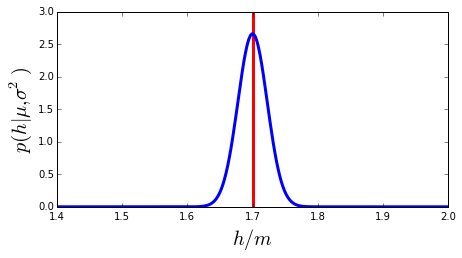

In [25]:
import numpy as np
h = np.linspace(0, 2.5, 1000)
sigma2 = 0.0225
mu = 1.7
p = 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(h-mu)**2/(2*sigma2**2))
f2, ax2 = plt.subplots(figsize=(7, 3.5))
ax2.plot(h, p, 'b-', linewidth=3)
ylim = (0, 3)
ax2.vlines(mu, ylim[0], ylim[1], colors='r', linewidth=3)
ax2.set_ylim(ylim)
ax2.set_xlim(1.4, 2.0)
ax2.set_xlabel('$h/m$', fontsize=20)
ax2.set_ylabel('$p(h|\mu, \sigma^2)$', fontsize = 20)
f2.savefig('./diagrams/gaussian_of_height.svg')

### Gaussian Density
![](./diagrams/gaussian_of_height.svg)
The Gaussian PDF with $\mu=1.7$ and variance $\sigma^2=
  0.0225$. Mean shown as red line. It could represent the heights of a population of
  students.

### Gaussian Density
$$
\mathcal{N}(y|\mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)
$$
$\sigma^2$ is the variance of the density and $\mu$ is the mean.



### Two Important Gaussian Properties

**Sum of Gaussian**

-   Sum of Gaussian variables is also Gaussian.
    $$y_i \sim \mathcal{N}(\mu, \sigma^2)$$ 
    And the sum is distributed as
    $$\sum_{i=1}^{n} y_i \sim \mathcal{N}\left(\sum_{i=1}^n \mu_i,\sum_{i=1}^n \sigma_i^2\right)$$
    (*Aside*: As sum increases, sum of non-Gaussian, finite variance variables is
    also Gaussian [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).)

### Two Important Gaussian Properties

**Scaling a Gaussian**

-   Scaling a Gaussian leads to a Gaussian.
    $$y \sim \mathcal{N}(\mu, \sigma^2)$$
    And the scaled density is distributed as
    $$w y \sim \mathcal{N}(w\mu,w^2 \sigma^2)$$

### Laplace's Idea

### A Probabilistic Process

-   Set the mean of Gaussian to be a function.
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\frac{\left(y_i-f\left(x_i\right)\right)^{2}}{2\sigma^2}\right).$$

-   This gives us a ‘noisy function’.

-   This is known as a stochastic process.

### Height as a Function of Weight

-   In the standard Gaussian, parametized by mean and variance.

-   Make the mean a linear function of an *input*.

-   This leads to a regression model. 
    \begin{align*}
       y_i=&f\left(x_i\right)+\epsilon_i,\\
         \epsilon_i \sim &\mathcal{N}(0, \sigma^2).
     \end{align*}
        
-   Assume $y_i$ is height and $x_i$ is weight.

### Data Point Likelihood

-   Likelihood of an individual data point
    $$p\left(y_i|x_i,\sigma^2,f()\right)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-f(x_i)\right)^{2}}{2\sigma^2}\right).$$

-   If $f(x_i) = mx_i + c$ then parameters are gradient, $m$, offset, $c$ of the function and noise
    variance $\sigma^2$.

### Data Set Likelihood

-   If the noise, $\epsilon_i$ is sampled independently for each
    data point.

-   Each data point is independent (given $m$ and $c$).

-   For independent variables:
    $$p(\mathbf{y}) = \prod_{i=1}^n p(y_i)$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n p(y_i|x_i, m, c)$$
    

### Two Simultaneous Equations

A system of two simultaneous equations with two
unknowns.

How do we deal with three simultaneous
equations with only two unknowns?

$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1-y_2 = & m(x_1 - x_2)
      \end{aligned}$$  
      
$$\begin{aligned}
        \frac{y_1-y_2}{x_1 - x_2} = & m
      \end{aligned}$$ 
      
$$\begin{aligned}
        m & =\frac{y_2-y_1}{x_2 - x_1}\\
        c & = y_1 - m x_1
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c\\
        y_3 = & mx_3 + c
      \end{aligned}$$

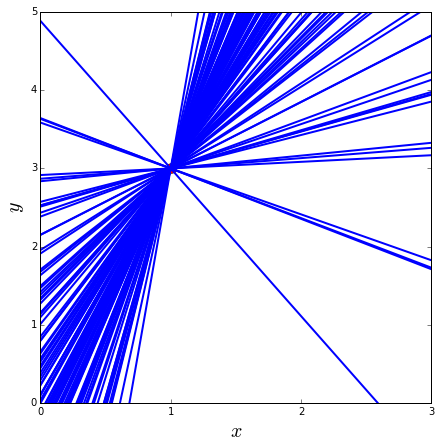

In [26]:
x = 1.
y = 3.
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, y, 'o', markersize=10, linewidth=3, color=[1., 0., 0.])
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3, 4, 5])
ylim = [0, 5]
xlim = [0, 3]
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
fig.savefig('./diagrams/one_point0.svg')

xvals = np.linspace(0, 3, 2)[:, None]
count=0
for i in range(100):
    c = np.random.normal(size=(1,1))*2
    m = (y - c)/x
    yvals = m*xvals+c
    ax.plot(xvals, yvals, '-', linewidth=2, color=[0., 0., 1.])
    if i < 9 or i == 100:
        count += 1
        fig.savefig('./diagrams/one_point' + str(count) + '.svg')

### Underdetermined System
- What about two unknowns and *one* observation?
    $$y_1 =  mx_1 + c$$

## Underdetermined System

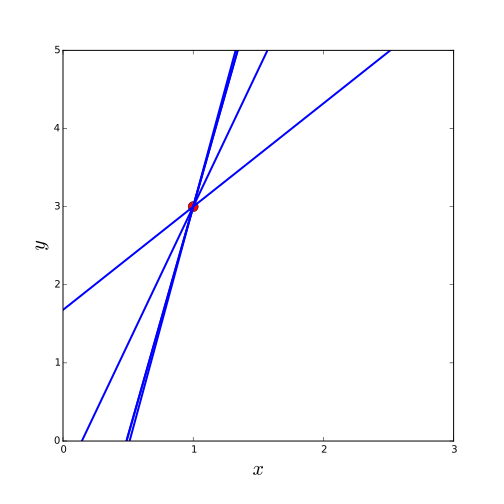

In [27]:
pods.notebook.display_plots('one_point{samp}.svg', directory='./diagrams', samp=(0, 10))

### Underdetermined System
- Can compute $m$ given $c$.
$$m = \frac{y_1 -c}{x}$$

### Underdetermined System

- Can compute $m$ given $c$.

Assume 
$$c \sim \mathcal{N}(0, 4),$$

### Overdetermined System

-   With two unknowns and two observations: 
    $$\begin{aligned}
          y_1 = & mx_1 + c\\
          y_2 = & mx_2 + c
        \end{aligned}$$

-   Additional observation leads to *overdetermined* system.
    $$y_3 =  mx_3 + c$$

-   This problem is solved through a noise model
    $\epsilon \sim \mathcal{N}(0,\sigma^2)$ $$\begin{aligned}
          y_1 = mx_1 + c + \epsilon_1\\
          y_2 = mx_2 + c + \epsilon_2\\
          y_3 = mx_3 + c + \epsilon_3
        \end{aligned}$$

### Noise Models

-   We aren’t modeling entire system.

-   Noise model gives mismatch between model and data.

-   Gaussian model justified by appeal to central limit theorem.

-   Other models also possible (Student-$t$ for heavy tails).

-   Maximum likelihood with Gaussian noise leads to *least squares*.

### Different Types of Uncertainty

-   The first type of uncertainty we are assuming is
    *aleatoric* uncertainty.

-   The second type of uncertainty we are assuming is
    *epistemic* uncertainty.

### Aleatoric Uncertainty

-   This is uncertainty we couldn’t know even if we wanted to. e.g. the
    result of a football match before it’s played.

-   Where a sheet of paper might land on the floor.

### Epistemic Uncertainty

-   This is uncertainty we could in principal know the answer too. We
    just haven’t observed enough yet, e.g. the result of a football
    match *after* it’s played.

-   What colour socks your lecturer is wearing.

### Prior Distribution

-   Bayesian inference requires a prior on the parameters.

-   The prior represents your belief *before* you see the data of the
    likely value of the parameters.

-   For linear regression, consider a Gaussian prior on the intercept:
    $$c \sim \mathcal{N}(0, \alpha_1)$$

### Posterior Distribution

-   Posterior distribution is found by combining the prior with
    the likelihood.

-   Posterior distribution is your belief *after* you see the data of
    the likely value of the parameters.

-   The posterior is found through **Bayes’ Rule**
    $$p(c|y) = \frac{p(y|c)p(c)}{p(y)}$$


### Bayes Update

/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


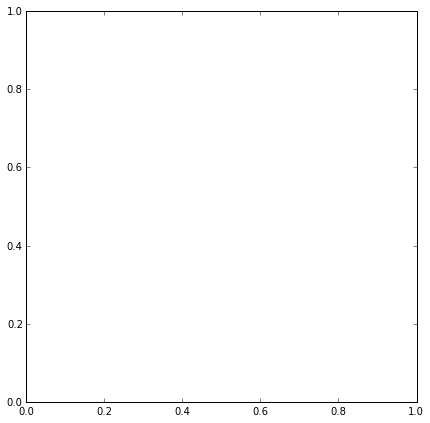

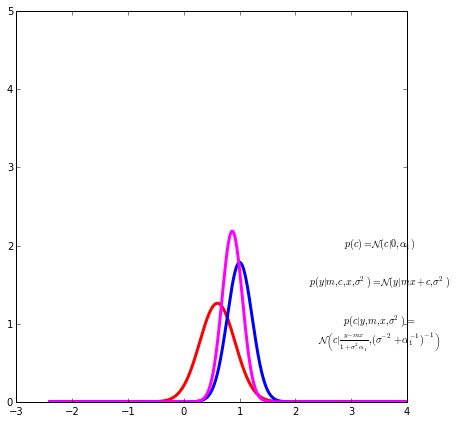

In [28]:
fig, ax = plt.subplots(figsize=(7,7))
num_points = 1000
x_max = 4
x_min = -3

y = np.array([[1.]])
prior_mean = np.array([[0.]])
prior_var = np.array([[.1]])

noise = mlai.Gaussian(offset=np.array([0.6]), scale=np.array(np.sqrt(0.05)))


f = np.linspace(x_min, x_max, num_points)[:, None]
ln_prior_curve = -0.5*(np.log(2*np.pi*prior_var) + (f-prior_mean)*(f-prior_mean)/prior_var)
ln_likelihood_curve = np.zeros(ln_prior_curve.shape)
for i in range(num_points):
    ln_likelihood_curve[i] = noise.log_likelihood(f[i][None, :], 
                                                  np.array([[np.finfo(float).eps]]), 
                                                  y)
ln_marginal_likelihood = noise.log_likelihood(prior_mean, prior_var, y);

prior_curve = np.exp(ln_prior_curve) 
likelihood_curve = np.exp(ln_likelihood_curve)
marginal_curve = np.exp(ln_marginal_likelihood)

ln_posterior_curve = ln_likelihood_curve + ln_prior_curve - ln_marginal_likelihood
posterior_curve = np.exp(ln_posterior_curve)

g, dlnZ_dvs = noise.grad_vals(prior_mean, prior_var, y)

nu = g*g - 2*dlnZ_dvs

approx_var = prior_var - prior_var*prior_var*nu
approx_mean = prior_mean + prior_var*g

ln_approx_curve = -0.5*np.log(2*np.pi*approx_var)-0.5*(f-approx_mean)*(f-approx_mean)/approx_var

approx_curve = np.exp(ln_approx_curve)
noise
xlim = [x_min, x_max] 
ylim = [0, np.vstack([approx_curve, likelihood_curve, 
                      posterior_curve, prior_curve]).max()*1.1]

fig, ax = plt.subplots(figsize=(7,7))

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([0, 1, 2, 3, 4, 5])

ax.vlines(xlim[0], ylim[0], ylim[1], color=[0., 0., 0.]) 
ax.hlines(ylim[0], xlim[0], xlim[1], color=[0., 0., 0.]) 

ax.plot(f, prior_curve, color=[1, 0., 0.], linewidth=3)
ax.text(3.5, 2, '$p(c) = \mathcal{N}(c|0, \\alpha_1)$', horizontalalignment='center') 
plt.savefig('./diagrams/dem_gaussian1.svg')

ax.plot(f, likelihood_curve, color=[0, 0, 1], linewidth=3)
ax.text(3.5, 1.5,'$p(y|m, c, x, \\sigma^2)=\mathcal{N}(y|mx+c,\\sigma^2)$', horizontalalignment='center') 
plt.savefig('./diagrams/dem_gaussian2.svg')

ax.plot(f, posterior_curve, color=[1, 0, 1], linewidth=3)
ax.text(3.5, 1, '$p(c|y, m, x, \\sigma^2)=$', horizontalalignment='center') 
plt.text(3.5, 0.75, '$\mathcal{N}\\left(c|\\frac{y-mx}{1+\\sigma^2\\alpha_1},(\\sigma^{-2}+\\alpha_1^{-1})^{-1}\\right)$', horizontalalignment='center') 
plt.savefig('./diagrams/dem_gaussian3.svg')

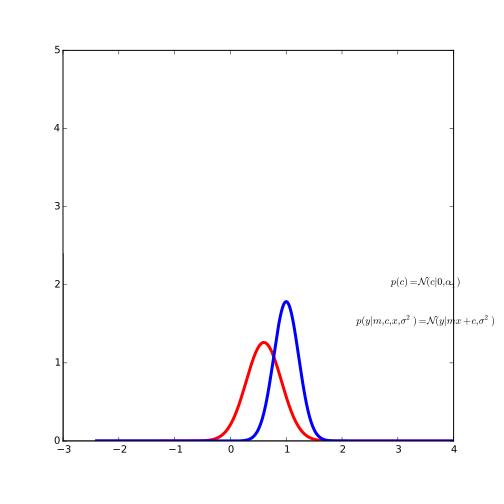

In [29]:
pods.notebook.display_plots('dem_gaussian{stage}.svg', './diagrams/', stage=(1, 3))

### Stages to Derivation of the Posterior

-   Multiply likelihood by prior

    -   they are "exponentiated quadratics", the answer is always also
        an exponentiated quadratic because
        $$\exp(a^2)\exp(b^2) = \exp(a^2 + b^2)$$

-   Complete the square to get the resulting density in the form of
    a Gaussian.

-   Recognise the mean and (co)variance of the Gaussian. This is the
    estimate of the posterior.

### Main Trick

$$p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)$$
$$p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2) = \frac{1}{\left(2\pi\sigma^2\right)^{\frac{n}{2}}} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - mx_i - c)^2\right)$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) = \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{p(\mathbf{y}|\mathbf{x}, m, \sigma^2)}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) =  \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{\int p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c) \text{d} c}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) \propto  p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)$$

$$\begin{aligned}
    \log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) =&-\frac{1}{2\sigma^2} \sum_{i=1}^n(y_i-c - mx_i)^2-\frac{1}{2\alpha_1} c^2 + \text{const}\\
     = &-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-mx_i)^2 -\left(\frac{n}{2\sigma^2} + \frac{1}{2\alpha_1}\right)c^2\\
    & + c\frac{\sum_{i=1}^n(y_i-mx_i)}{\sigma^2},
  \end{aligned}$$

complete the square of the quadratic form to obtain
$$\log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},$$
where $\tau^2 = \left(n\sigma^{-2} +\alpha_1^{-1}\right)^{-1}$
and
$\mu = \frac{\tau^2}{\sigma^2} \sum_{i=1}^n(y_i-mx_i)$.

### The Joint Density

-   Really want to know the *joint* posterior density over the
    parameters $c$ *and* $m$.

-   Could now integrate out over $m$, but it’s easier to consider the
    multivariate case.

### Sampling a Function

**Multi-variate Gaussians**

* We will consider a Gaussian with a particular structure of covariance
    matrix.
* Generate a single sample from this 25 dimensional Gaussian distribution, $\mathbf{f}=\left[f_{1},f_{2}\dots f_{25}\right]$.

* We will plot these points against their index.


In [30]:
# %load -s compute_kernel mlai.py
def compute_kernel(X, X2, kernel, **kwargs):
    K = np.zeros((X.shape[0], X2.shape[0]))
    for i in np.arange(X.shape[0]):
        for j in np.arange(X2.shape[0]):
            K[i, j] = kernel(X[i, :], X2[j, :], **kwargs)
        
    return K


In [31]:
# %load -s exponentiated_quadratic mlai.py
def exponentiated_quadratic(x, x_prime, variance=1., lengthscale=1.):
    "Exponentiated quadratic covariance function."
    squared_distance = ((x-x_prime)**2).sum()
    return variance*np.exp((-0.5*squared_distance)/lengthscale**2)        


In [32]:
# %load -s plot_matrix plot.py
def plot_matrix(A, ax=None,
                bracket_width=3,
                bracket_style='square',
                type='values',
                colormap=False,
                highlight=False,
                highlight_row=None,
                highlight_col=None,
                highlight_width=3,
                highlight_color=[0,0,0],
                zoom=False,
                zoom_row=None,
                zoom_col=None,
                bracket_color=[0,0,0]):
    """Plot a matrix for visualisation in a slide or piece of text."""
    
    if ax is None:
        ax = plt.gca()
        
    nrows, ncols = A.shape
    
  
    x_lim = np.array([-0.75, ncols-0.25])
    y_lim = np.array([-0.75, nrows-0.25])
  
    ax.cla()
    handle=[]
    if type == 'image':
        handle =  ax.matshow(A)
    elif type == 'imagesc':
        handle =  ax.images(A, [np.array([A.min(), 0]).min(), A.max()])
    elif type == 'values':
        for i in range(nrows):
            for j in range(ncols):
                handle.append(ax.text(j, i, str(A[i, j]), horizontalalignment='center'))
    elif type == 'entries':
        for i in range(nrows):
            for j in range(ncols):
                if isstr(A[i,j]):
                    handle.append(ax.text(j, i, A[i, j], horizontalalignment='center'))
                    
                else:  
                    handle.append(ax.text(j+1, i+1, ' ', horizontalalignment='center'))
    elif type == 'patch':
        for i in range(nrows):
            for j in range(ncols):
                handle.append(ax.add_patch(
                    plt.Rectangle([i-0.5, j-0.5],
                                  width=1., height=1.,
                                  color=(A[i, j])*np.array([1, 1, 1]))))
    elif type == 'colorpatch':
        for i in range(nrows):
            for j in range(ncols):
                handle.append(ax.add_patch(
                    plt.Rectangle([i-0.5, j-0.5],
                                  width=1., height=1.,
                                  color=np.array([A[i, j, 0],
                                                  A[i, j, 1],
                                                  A[i, j, 2]]))))
                
                
    if bracket_style == 'boxes':
        x_lim = np.array([-0.5, ncols-0.5])
        ax.set_xlim(x_lim)
        y_lim = np.array([-0.5, nrows-0.5])
        ax.set_ylim(y_lim)
        for i in range(nrows+1):
            ax.add_line(plt.axhline(y=i-.5, #xmin=-0.5, xmax=ncols-0.5, 
                 color=bracket_color))
        for j in range(ncols+1):
            ax.add_line(plt.axvline(x=j-.5, #ymin=-0.5, ymax=nrows-0.5, 
                 color=bracket_color))
    elif bracket_style == 'square':
        tick_length = 0.25
        ax.plot([x_lim[0]+tick_length,
                     x_lim[0], x_lim[0],
                     x_lim[0]+tick_length],
                    [y_lim[0], y_lim[0],
                     y_lim[1], y_lim[1]],
                    linewidth=bracket_width,
                    color=np.array(bracket_color))
        ax.plot([x_lim[1]-tick_length, x_lim[1],
                              x_lim[1], x_lim[1]-tick_length],
                             [y_lim[0], y_lim[0], y_lim[1],
                              y_lim[1]],
                             linewidth=bracket_width, color=np.array(bracket_color))
      
    if highlight:       
        h_row = highlight_row
        h_col = highlight_col
        if isinstance(h_row, str) and h_row == ':':
            h_row = [0, nrows]
        if isinstance(h_col, str) and h_col == ':':
            h_col = [0, ncols]
        if len(h_row) == 1:
            h_row = [h_row, h_row]
        if len(h_col) == 1:
            h_col = [h_col, h_col]
        h_col.sort()
        h_row.sort()
        ax.add_line(plt.Line2D([h_col[0]-0.5, h_col[0]-0.5,
                              h_col[1]+0.5, h_col[1]+0.5,
                              h_col[0]-0.5],
                             [h_row[0]-0.5, h_row[1]+0.5,
                              h_row[1]+0.5, h_row[0]-0.5,
                              h_row[0]-0.5], color=highlight_color,
                               linewidth=highlight_width))
                    
    if zoom:      
        z_row = zoom_row
        z_col = zoom_col
        if isinstance(z_row, str) and z_row == ':':
            z_row = [1, nrows]
        if isinstance(z_col, str) and z_col == ':':
            z_col = [1, ncols]
        if len(z_row) == 1:
            z_row = [z_row, z_row]
        if len(z_col) == 1:
            z_col = [z_col, z_col]
        z_col.sort()
        z_row.sort()
        x_lim = [z_col[0]-0.5, z_col[1]+0.5]
        y_lim = [z_row[0]-0.5, z_row[1]+0.5]

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_aspect('equal')
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis() #axis ij, axis equal, axis off

    if colormap:
        plt.colormap(obj=options.colormap) 
             
    return handle 


In [33]:
# %load -s base_plot plot.py
def base_plot(K, ind=[0, 1], ax=None,
              contour_color=[0., 0., 1],
              contour_style='-',
              contour_size=4,
              contour_markersize=4,
              contour_marker='x',
              fontsize=20):
    """
    % BASEPLOT Plot the contour of the covariance.
    % FORMAT
    % DESC creates the basic plot.
    % """

    blackcolor = [0,0,0]
    if ax is None:
        ax = plt.gca()
    v, U = np.linalg.eig(K[ind][:, ind])
    r = np.sqrt(v)
    theta = np.linspace(0, 2*np.pi, 200)[:, None]
    xy = np.dot(np.concatenate([r[0]*np.sin(theta), r[1]*np.cos(theta)], axis=1),U.T)
    cont = plt.Line2D(xy[:, 0], xy[:, 1],
                      linewidth=contour_size,
                      linestyle=contour_style,
                      color=contour_color)
    cent = plt.Line2D([0.], [0.],
                      marker=contour_marker,
                      color=contour_color,
                      linewidth=contour_size,
                      markersize=contour_markersize)

    ax.add_line(cont)
    ax.add_line(cent)

    thandle = []
    thandle.append(ax.set_xlabel('$f_{' + str(ind[1]+1)+ '}$',
                   fontsize=fontsize))
    thandle.append(ax.set_ylabel('$f_{' + str(ind[0]+1)+ '}$',
                   fontsize=fontsize))
    
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    x_lim = [-1.5, 1.5]
    y_lim = [-1.5, 1.5]
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    
    ax.add_line(plt.Line2D(x_lim, [0, 0], color=blackcolor))
    ax.add_line(plt.Line2D([0, 0], y_lim, color=blackcolor))

    ax.set_aspect('equal')
    #zeroAxes(gca, 0.025, 18, 'times')
    
    return cont, thandle, cent 


In [34]:
# %load -s plot_two_point_pred plot.py
def plot_two_point_pred(K, f, x, ax=None, ind=[0, 1],
                        conditional_linestyle = '-',
                        conditional_linecolor = [1., 0., 0.],
                        conditional_size = 4,
                        fixed_linestyle = '-',
                        fixed_linecolor = [0., 1., 0.],
                        fixed_size = 4,stub=None, start=0):
    
    subK = K[ind][:, ind]
    f = f[ind]
    x = x[ind]

    if ax is None:
        ax = plt.gca()

    cont, t, cent = base_plot(K, ind, ax=ax)
    if stub is not None:
        plt.savefig('./diagrams/' + stub + str(start) + '.svg')

    x_lim = ax.get_xlim()
    cont2 = plt.Line2D([x_lim[0], x_lim[1]], [f[0], f[0]], linewidth=fixed_size, linestyle=fixed_linestyle, color=fixed_linecolor)
    ax.add_line(cont2)

    if stub is not None:
        plt.savefig('./diagrams/' + stub + str(start+1) + '.svg')

    # # Compute conditional mean and variance
    f2_mean = subK[0, 1]/subK[0, 0]*f[0]
    f2_var = subK[1, 1] - subK[0, 1]/subK[0, 0]*subK[0, 1]
    x_val = np.linspace(x_lim[0], x_lim[1], 200)
    pdf_val = 1/np.sqrt(2*np.pi*f2_var)*np.exp(-0.5*(x_val-f2_mean)*(x_val-f2_mean)/f2_var)
    pdf = plt.Line2D(x_val, pdf_val+f[0], linewidth=conditional_size, linestyle=conditional_linestyle, color=conditional_linecolor)
    ax.add_line(pdf)
    if stub is not None:
        plt.savefig('./diagrams/' + stub + str(start+2) + '.svg')
    
    obs = plt.Line2D([f[1]], [f[0]], linewidth=10, markersize=10, color=fixed_linecolor, marker='o')
    ax.add_line(obs)
    if stub is not None:
        plt.savefig('./diagrams/' + stub + str(start+3) + '.svg')
    
    # load gpdistfunc

    #printLatexText(['\mappingFunction_1=' numsf2str(f[0], 3)], 'inputValueF1.tex', '../../../gp/tex/diagrams')


In [35]:
# %load -s kern_circular_sample plot.py
def kern_circular_sample(mu, K, filename=None, ax=None, num_samps=5, num_theta=200):

    """% KERNCIRCULARSAMPLE Sample from covariance in a circular way alla Hennig.
    %
    % FORMAT
    % DESC samples from GP along elipses of equiprobability
    % ARG mu : mean of GP.
    % ARG K : covariance of GP.
    % ARG num_samps : number of samples from the Gaussian process.
    % RETURN includeText : the text used to include in latex.
    %
    % SEEALSO : kernCreate
    %
    % COPYRIGHT: Neil D. Lawrence, 2013
    
    % GPMAT"""

    tau = 2*np.pi
    n = K.shape[0]


    R1 = np.random.normal(size=(n, num_samps))
    U1 = np.dot(R1,np.diag(1/np.sqrt(np.sum(R1*R1, axis=0))))
    R2 = np.random.normal(size=(n, num_samps))
    R2 = R2 - np.dot(U1,np.diag(np.sum(R2*U1, axis=0)))
    R2 = np.dot(R2,np.diag(np.sqrt(np.sum(R1*R1, axis=0))/np.sqrt(np.sum(R2*R2, axis=0))))
    L = np.linalg.cholesky(K+np.diag(np.ones((n)))*1e-6)


    from matplotlib import animation
    x_lim = (0, 1)
    y_lim = (-2, 2)
    if ax is None:
        ax = plt.axes(xlim=x_lim, ylim=y_lim)
    else:
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
    line = []
    for i in range(num_samps):
        l, = ax.plot([], [], lw=2)
        line.append(l)
        
    # initialization function: plot the background of each frame
    def init():
        for i in range(num_samps):
            line[i].set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        theta = float(i)/num_theta*tau
        xc = np.cos(theta)
        yc = np.sin(theta)
        # generate 2d basis in t-d space
        coord = xc*R1 + yc*R2
        y = np.dot(L,coord)
        x = np.linspace(0, 1, n)
        for i in range(num_samps):
            line[i].set_data(x, y[:, i])
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=num_theta, blit=True)
    if filename is not None:
        anim.save('./diagrams/' + filename, writer='imagemagick', fps=30)


/Users/neil/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:12: RuntimeWarning: covariance is not positive-semidefinite.


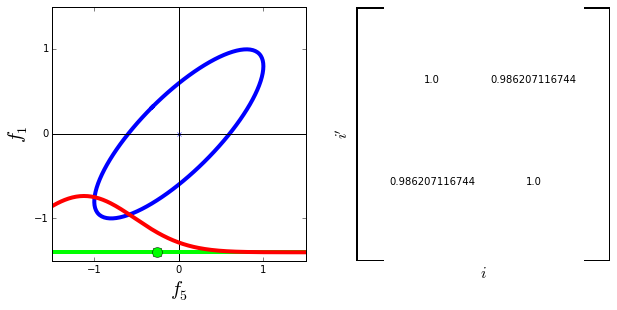

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=((10,5)))
hcolor = [1., 0., 1.]
x = np.linspace(-1, 1, 25)[:, None]
K = compute_kernel(x, x, exponentiated_quadratic, lengthscale=0.5)
obj = plot_matrix(K, ax=ax[1], type='image')
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
#fig.colorbar(mappable=obj, ax=ax[1])
#ax[1].set_axis('off')
plt.savefig('./diagrams/dem_two_point_sample0.svg')

f = np.random.multivariate_normal(np.zeros(25), K, size=1)
ax[0].plot(range(1, 26), f.flatten(), 'o', markersize=5, linewidth=3, color=[1., 0., 0.])
ax[0].set_xticks(range(1, 26, 2))
ax[0].set_yticks([-2, -1, 0, 1, 2])
ylim = [-2, 2]
xlim = [0, 26]
ax[0].set_ylim(ylim)
ax[0].set_xlim(xlim)
ax[0].set_xlabel('$i$', fontsize=20)
ax[0].set_ylabel('$f$', fontsize=20)
plt.savefig('./diagrams/dem_two_point_sample1.svg')

ax[0].plot(np.array([1, 2]), [f[0,0], f[0,1]], 'o', markersize=10, linewidth=5, color=hcolor)
plt.savefig('./diagrams/dem_two_point_sample2.svg')
#plt.Circle?

obj = plot_matrix(K, ax=ax[1], type='image', 
                  highlight=True, 
                  highlight_row=[0, 1], 
                  highlight_col=[0,1], 
                  highlight_color=hcolor)
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
plt.savefig('./diagrams/dem_two_point_sample3.svg')

obj = plot_matrix(K, ax=ax[1], type='image', 
                  highlight=True, 
                  highlight_row=[0, 1], 
                  highlight_col=[0,1], 
                  highlight_color=hcolor,
                  highlight_width=5,
                 zoom=True,
                 zoom_row=[0, 9],
                 zoom_col=[0, 9])
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
plt.savefig('./diagrams/dem_two_point_sample4.svg')

obj = plot_matrix(K, ax=ax[1], type='image', 
                  highlight=True, 
                  highlight_row=[0, 1], 
                  highlight_col=[0,1], 
                  highlight_color=hcolor,
                  highlight_width=6,
                 zoom=True,
                 zoom_row=[0, 4],
                 zoom_col=[0, 4])
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
plt.savefig('./diagrams/dem_two_point_sample5.svg')

obj = plot_matrix(K, ax=ax[1], type='image', 
                  highlight=True, 
                  highlight_row=[0, 1], 
                  highlight_col=[0,1], 
                  highlight_color=hcolor,
                  highlight_width=7,
                 zoom=True,
                 zoom_row=[0, 2],
                 zoom_col=[0, 2])
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
plt.savefig('./diagrams/dem_two_point_sample6.svg')

obj = plot_matrix(K, ax=ax[1], type='image', 
                  highlight=True, 
                  highlight_row=[0, 1], 
                  highlight_col=[0,1], 
                  highlight_color=hcolor,
                  highlight_width=8,
                 zoom=True,
                 zoom_row=[0, 1],
                 zoom_col=[0, 1])
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
plt.savefig('./diagrams/dem_two_point_sample7.svg')

obj = plot_matrix(K[:2, :2], ax=ax[1], type='values')
ax[1].set_xlabel('$i$',fontsize=16)
ax[1].set_ylabel('$i^\prime$',fontsize=16)
plt.savefig('./diagrams/dem_two_point_sample8.svg')

ax[0].cla()
plot_two_point_pred(K, f.T, x, ax=ax[0],ind=[0, 1], stub='dem_two_point_sample', start=9)

ax[0].cla()
plot_two_point_pred(K, f.T, x, ax=ax[0],ind=[0, 4], stub='dem_two_point_sample', start=13)

## Gaussian Samples

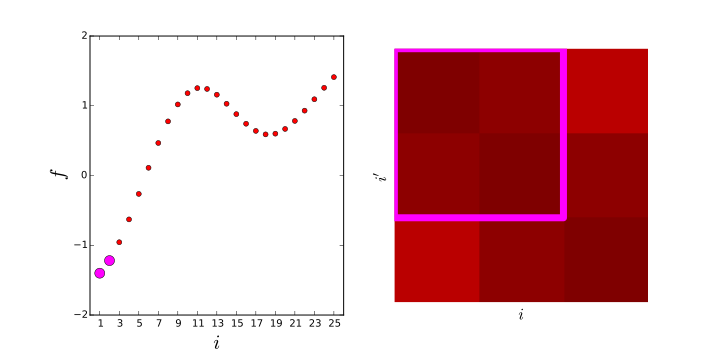

In [37]:
pods.notebook.display_plots('dem_two_point_sample{sample}.svg', './diagrams/', sample=(0,12))

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Uluru_Panorama.jpg/799px-Uluru_Panorama.jpg" alignment='center'>

## Prediction with Correlated Gaussians
  * Prediction of $f_2$ from $f_1$ requires *conditional density*.
  * Conditional density is *also* Gaussian.
    $$
    p(f_2|f_1) = \mathcal{N}\left(f_2|\frac{k_{1, 2}}{k_{1, 1}}f_1, k_{2, 2} - \frac{k_{1,2}^2}{k_{1,1}}\right)
    $$
    where covariance of joint density is given by
    $$
    \mathbf{K} = \begin{bmatrix} k_{1, 1} & k_{1, 2}\\ k_{2, 1} & k_{2, 2}\end{bmatrix}
    $$

## Gaussian Samples

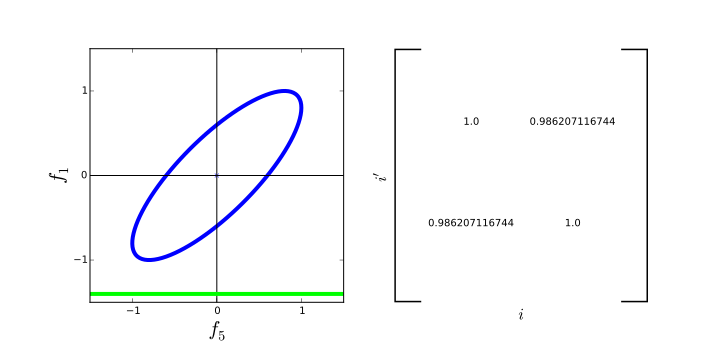

In [38]:
pods.notebook.display_plots('dem_two_point_sample{sample}.svg', './diagrams/', sample=(13,16))

## Prediction with Correlated Gaussians
  * Prediction of $\mathbf{f}_*$ from $\mathbf{f}$ requires multivariate *conditional density*.
  * Multivariate conditional density is *also* Gaussian.
    $$
    p(\mathbf{f}_*|\mathbf{f}) = \mathcal{N}\left(\mathbf{f}_*|\mathbf{K}_{*,\mathbf{f}}\mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{f},\mathbf{K}_{*,*}-\mathbf{K}_{*,\mathbf{f}} \mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{K}_{\mathbf{f},*}\right)
    $$

## Prediction with Correlated Gaussians
  * Prediction of $\mathbf{f}_*$ from $\mathbf{f}$ requires multivariate *conditional density*.
  * Multivariate conditional density is *also* Gaussian.
    $$
    p(\mathbf{f}_*|\mathbf{f}) = \mathcal{N}\left(\mathbf{f}_*|\boldsymbol{\mu},\boldsymbol{\Sigma}\right)
    $$
    $$
    \boldsymbol{\mu} = \mathbf{K}_{*,\mathbf{f}}\mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{f}     
    $$
    $$
    \boldsymbol{\Sigma} = \mathbf{K}_{*,*}-\mathbf{K}_{*,\mathbf{f}} \mathbf{K}_{\mathbf{f},\mathbf{f}}^{-1}\mathbf{K}_{\mathbf{f},*}
    $$
  * Here covariance of joint density is given by
    $$
    \mathbf{K} = \begin{bmatrix} \mathbf{K}_{\mathbf{f}, \mathbf{f}} & \mathbf{K}_{*, \mathbf{f}}\\ \mathbf{K}_{\mathbf{f}, *} & \mathbf{K}_{*, *}\end{bmatrix}
    $$
  

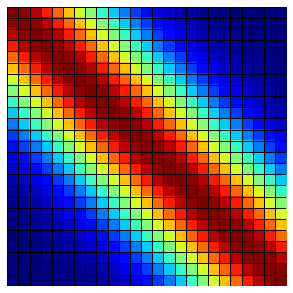

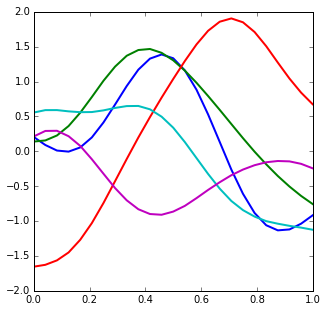

In [39]:
fig, ax = plt.subplots(figsize=((5,5)))
hcolor = [1., 0., 1.]
x = np.linspace(-1, 1, 25)[:, None]
K = compute_kernel(x, x, exponentiated_quadratic, lengthscale=0.5)
obj = plot_matrix(K, ax=ax, type='image', bracket_style='boxes')
plt.savefig('./diagrams/eq_covariance.svg')

fig, ax = plt.subplots(figsize=((5,5)))
kern_circular_sample([], K, filename='eq_covariance.gif')

## Where Did This Covariance Matrix Come From?
$$
k(\mathbf{x}, \mathbf{x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{x} - \mathbf{x}^\prime\right\Vert^2_2}{2\ell^2}\right)$$

<table cellspacing="0" cellpadding="0" border="none">
<tr><td>
<ul><li>Covariance matrix is
built using the *inputs* to
the function x.</li>

<li>For the example above it
was based on Euclidean
distance.</li>

<li>The covariance function
is also know as a kernel.</li>
</ul></td><td><img src='./diagrams/eq_covariance.svg' align='right'></td></tr>
</table>

## Where Did This Covariance Matrix Come From?
$$
k(\mathbf{x}, \mathbf{x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{x} - \mathbf{x}^\prime\right\Vert^2_2}{2\ell^2}\right)$$

<table cellspacing="0" cellpadding="0" border="none">
<tr><td>
<ul><li>Covariance matrix is
built using the *inputs* to
the function x.</li>

<li>For the example above it
was based on Euclidean
distance.</li>

<li>The covariance function
is also know as a kernel.</li>
</ul></td><td><img src='./diagrams/eq_covariance.gif' align='right'></td></tr>
</table>

### Gaussian Distribution Sample
  


## Extremely Short Overview


## Log Odds

* model the *log-odds* with the basis functions.
* [odds](http://en.wikipedia.org/wiki/Odds) are defined as the ratio of the probability of a positive outcome, to the probability of a negative outcome. 
* Probability is between zero and one, odds are:
    $$ \frac{\pi}{1-\pi} $$
* Odds are between $0$ and $\infty$. 
* Logarithm of odds maps them to $-\infty$ to $\infty$.

### Logit Link Function

* The [Logit function](http://en.wikipedia.org/wiki/Logit), $$g^{-1}(\pi_i) = \log\frac{\pi_i}{1-\pi_i}.$$ This function is known as a *link function*.

* For a standard regression we take,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i),$$
* For classification we perform a logistic regression. 
    $$\log \frac{\pi_i}{1-\pi_i} = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)$$

### Inverse Link Function

We have defined the link function as taking the form $g^{-1}(\cdot)$ implying that the inverse link function is given by $g(\cdot)$. Since we have defined,
$$
g^{-1}(\pi(\mathbf{x})) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})
$$
we can write $\pi$ in terms of the *inverse link* function, $g(\cdot)$ as 
$$
\pi(\mathbf{x}) = g(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})).
$$

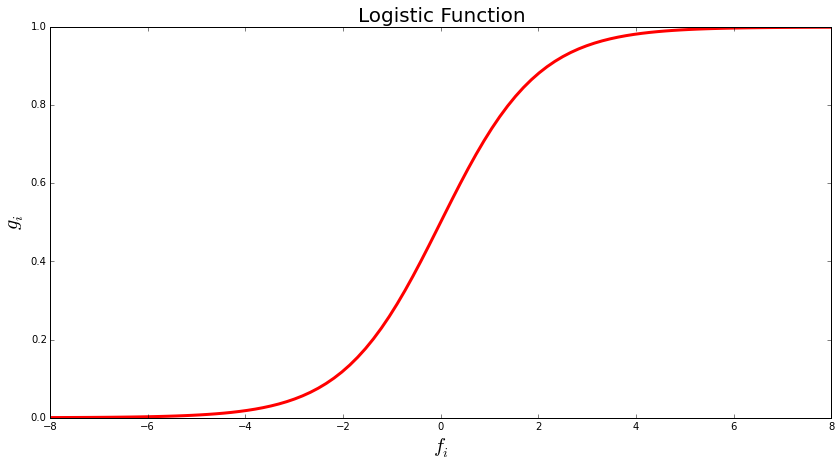

In [42]:
fig, ax = plt.subplots(figsize=(14,7))
f = np.linspace(-8, 8, 100)
g = 1/(1+np.exp(-f))

ax.plot(f, g, 'r-', lw=3)
ax.set_title('Logistic Function', fontsize=20)
ax.set_xlabel('$f_i$', fontsize=20)
ax.set_ylabel('$g_i$', fontsize=20)
plt.savefig('./diagrams/logistic.svg')

### Logistic function

* [Logistic](http://en.wikipedia.org/wiki/Logistic_function) (or sigmoid) squashes real line to between 0   & 1. Sometimes also called a 'squashing function'. 
![](./diagrams/logistic.svg)


### Prediction Function
* Can now write $\pi$ as a function of the input and the parameter vector as, $$\pi(\mathbf{x},\mathbf{w}) = \frac{1}{1+ \exp\left(-\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)}.$$

* Compute the output of a standard linear basis function composition ($\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})$, as we did for linear regression)

* Apply the inverse link function, $g(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}))$. 

* Use this value in a Bernoulli distribution to form the likelihood. 

### Bernoulli Reminder

$$P(y_i|\mathbf{w}, \mathbf{x}) = \pi_i^{y_i} (1-\pi_i)^{1-y_i}$$

* Trick for switching betwen probabilities
```python
def bernoulli(y, pi):
    if y == 1:
        return pi
    else:
        return 1-pi
```

### Maximum Likelihood


* Conditional independence of data:$$P(\mathbf{y}|\mathbf{w}, \mathbf{X}) = \prod_{i=1}^n P(y_i|\mathbf{w}, \mathbf{x}_i). $$

### Log Likelihood

\begin{align*}
\log P(\mathbf{y}|\mathbf{w}, \mathbf{X}) = & \sum_{i=1}^n \log P(y_i|\mathbf{w}, \mathbf{x}_i) \\ = &\sum_{i=1}^n y_i \log \pi_i \\ & + \sum_{i=1}^n (1-y_i)\log (1-\pi_i)
\end{align*}

### Objective Function

* Probability of positive outcome for the $i$th data point $$\pi_i = g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)\right),$$ where $g(\cdot)$ is the *inverse* link function

* Objective function of the form \begin{align*}
E(\mathbf{w}) = & -  \sum_{i=1}^n y_i \log g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)\right) \\& - \sum_{i=1}^n(1-y_i)\log \left(1-g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)\right)\right).
\end{align*}

### Minimize Objective

* Grdient wrt  $\pi(\mathbf{x};\mathbf{w})$ 
\begin{align*}
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = & -\sum_{i=1}^n \frac{y_i}{g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)}\frac{\text{d}g(f_i)}{\text{d}f_i} \boldsymbol{\phi(\mathbf{x}_i)} \\ & +  \sum_{i=1}^n \frac{1-y_i}{1-g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)}\frac{\text{d}g(f_i)}{\text{d}f_i} \boldsymbol{\phi(\mathbf{x}_i)}
\end{align*}

### Link Function Gradient

* Also need gradient of inverse link function wrt parameters.
\begin{align*}
g(f_i) &= \frac{1}{1+\exp(-f_i)}\\
&=(1+\exp(-f_i))^{-1}
\end{align*}
and the gradient can be computed as
\begin{align*}
\frac{\text{d}g(f_i)}{\text{d} f_i} & = \exp(-f_i)(1+\exp(-f_i))^{-2}\\
& = \frac{1}{1+\exp(-f_i)} \frac{\exp(-f_i)}{1+\exp(-f_i)} \\
& = g(f_i) (1-g(f_i))
\end{align*}

### Objective Gradient

\begin{align*}
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = & -\sum_{i=1}^n y_i\left(1-g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)\right) \boldsymbol{\phi(\mathbf{x}_i)} \\ & + \sum_{i=1}^n (1-y_i)\left(g\left(\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})\right)\right) \boldsymbol{\phi(\mathbf{x}_i)}.
\end{align*}

### Optimization of the Function

* Can't find a stationary point of the objective function analytically.

* Optimization has to proceed by *numerical methods*. 
    * [Newton's method](http://en.wikipedia.org/wiki/Newton%27s_method) or 
    * [gradient based optimization methods](http://en.wikipedia.org/wiki/Gradient_method) 
    
* Similarly to matrix factorization, for large data *stochastic gradient descent*  (Robbins Munroe optimization procedure) works well. 

### Ad Matching for Facebook

* This approach used in many internet companies.

* Example: ad matching for Facebook.
    * Millions of advertisers
    * Billions of users
    * How do you choose who to show what?
    
* Logistic regression used in combination with [decision trees]()

* [Paper available here](http://www.herbrich.me/papers/adclicksfacebook.pdf)

### Other GLMs

* Logistic regression is part of a family known as *generalized linear models*

* They all take the form $$g^{-1}(f_i(x)) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_i)$$

* As another example let's look at *Poisson regression*.



### Poisson Distribution

* Poisson distribution is used for 'count data'. For non-negative integers, $y$, $$P(y) = \frac{\lambda^y}{y!}\exp(-y)$$

* Here $\lambda$ is a *rate* parameter that can be thought of as the number of arrivals per unit time.

* Poisson distributions can be used for disease count data. E.g. number of incidence of malaria in a district.


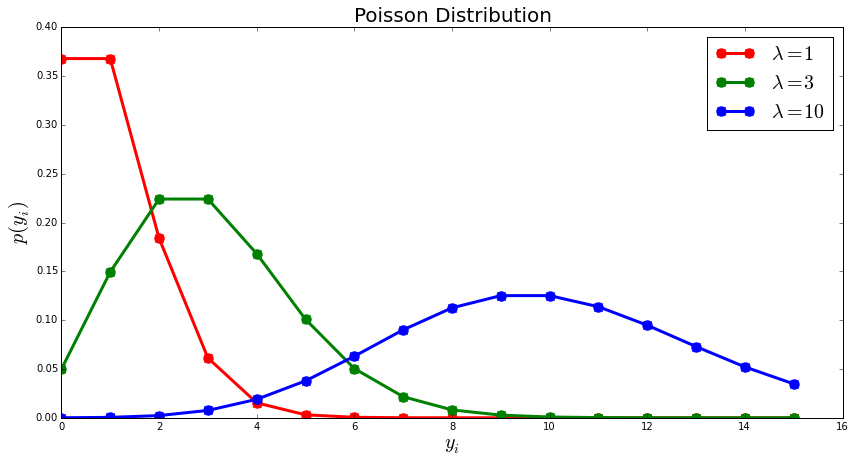

In [41]:
from scipy.stats import poisson
fig, ax = plt.subplots(figsize=(14,7))
y = np.asarray(range(0, 16))
p1 = poisson.pmf(y, mu=1.)
p3 = poisson.pmf(y, mu=3.)
p10 = poisson.pmf(y, mu=10.)

ax.plot(y, p1, 'r.-', markersize=20, label='$\lambda=1$', lw=3)
ax.plot(y, p3, 'g.-', markersize=20, label='$\lambda=3$', lw=3)
ax.plot(y, p10, 'b.-', markersize=20, label='$\lambda=10$', lw=3)
ax.set_title('Poisson Distribution', fontsize=20)
ax.set_xlabel('$y_i$', fontsize=20)
ax.set_ylabel('$p(y_i)$', fontsize=20)
ax.legend(fontsize=20)
plt.savefig('./diagrams/poisson.svg')


### Poisson Distribution

![](./diagrams/poisson.svg)

### Poisson Regression

* In a Poisson regression make rate a function of space/time.$$\log \lambda(\mathbf{x}, t) = \mathbf{w}_x^\top \boldsymbol{\phi_x(\mathbf{x})} + \mathbf{w}_t^\top \boldsymbol{\phi}_t(t)$$

* This is known as a *log linear* or *log additive* model. 

* The link function is a logarithm.

* We can rewrite such a function as 
$$\log \lambda(\mathbf{x}, t) = f_x(\mathbf{x}) + f_t(t)$$

### Multiplicative Model

* Be careful though ... a log additive model is really multiplicative.
$$\log \lambda(\mathbf{x}, t) = f_x(\mathbf{x}) + f_t(t)$$

* Becomes $$\lambda(\mathbf{x}, t) = \exp(f_x(\mathbf{x}) + f_t(t))$$

* Which is equivalent to  $$\lambda(\mathbf{x}, t) = \exp(f_x(\mathbf{x}))\exp(f_t(t))$$

* Link functions can be deceptive in this way.

@Saul:chained16